In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
ratings_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratings = pd.read_csv(ratings_url)

* Minority: does the instructor belong to a minority group?
* Age: the professor's age
* Gender: gender
* Credits: is the course a single-credict elective?
* Beauty: rating of the instructor's physical appearance by a panel of six students averaged across the six panelists and standardized to have a mean of zero.
* Eval: course overall teaching evaluation score
* division: is the course an upper or lower division course?
* native: is the instructor a native English speaker?
* tenure: is the instructor on a tenure track?
* students: number of students that participated in the evaluation
* allstudents: number of students enrolled in the course.
* prof: indicating instructor identifier.

In [3]:
ratings.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


In [5]:
ratings.shape

(463, 19)

In [4]:
ratings.info()
# Categorical Variables: minority, gender, credits, division, native, tenure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minority         463 non-null    object 
 1   age              463 non-null    int64  
 2   gender           463 non-null    object 
 3   credits          463 non-null    object 
 4   beauty           463 non-null    float64
 5   eval             463 non-null    float64
 6   division         463 non-null    object 
 7   native           463 non-null    object 
 8   tenure           463 non-null    object 
 9   students         463 non-null    int64  
 10  allstudents      463 non-null    int64  
 11  prof             463 non-null    int64  
 12  PrimaryLast      463 non-null    int64  
 13  vismin           463 non-null    int64  
 14  female           463 non-null    int64  
 15  single_credit    463 non-null    int64  
 16  upper_division   463 non-null    int64  
 17  English_speaker 

Can you identify whether the teachers' rating data is time-series or cross-sectional?
1. Does it have a date or time variable? - No, it is not a time-series dataset.
2. Does it observe more than one teacher being rated? Yesm it is a cross-sectional dataset.


In [6]:
# find the mean, median, minimum and maximum values for students
ratings['students'].mean(), ratings['students'].median(), ratings['students'].min(), ratings['students'].max()

(36.62419006479482, 23.0, 5, 380)

In [7]:
# produce a descriptive statistics table
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
age,463.0,4.836501e+01,9.802742,29.000000,42.000000,48.000000,57.000000,73.000000
beauty,463.0,6.271140e-08,0.788648,-1.450494,-0.656269,-0.068014,0.545602,1.970023
eval,463.0,3.998272e+00,0.554866,2.100000,3.600000,4.000000,4.400000,5.000000
students,463.0,3.662419e+01,45.018481,5.000000,15.000000,23.000000,40.000000,380.000000
allstudents,463.0,5.517711e+01,75.072800,8.000000,19.000000,29.000000,60.000000,581.000000
prof,463.0,4.543413e+01,27.508902,1.000000,20.000000,44.000000,70.500000,94.000000
PrimaryLast,463.0,2.030238e-01,0.402685,0.000000,0.000000,0.000000,0.000000,1.000000
vismin,463.0,1.382289e-01,0.345513,0.000000,0.000000,0.000000,0.000000,1.000000
female,463.0,4.211663e-01,0.494280,0.000000,0.000000,0.000000,1.000000,1.000000
single_credit,463.0,5.831533e-02,0.234592,0.000000,0.000000,0.000000,0.000000,1.000000


<AxesSubplot:xlabel='beauty', ylabel='Count'>

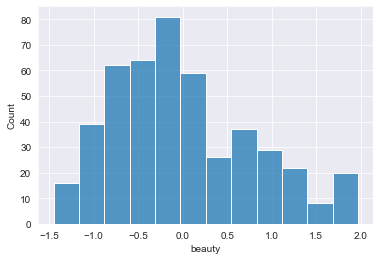

In [8]:
# create a histogram of the beauty variable and briefly comment on the distribution of the data.
sns.histplot(data=ratings, x='beauty')

Observations:
- The data distribution is skewed to the right.
- Most of the data focuses between -0.5 and 0.
- Therefore, we can say the mean is close to 0.

In [11]:
# Does average beauty score differ by gender? Produce the means and standard deviations for both male and female instructors.
#pd.crosstab(ratings['beauty'], ratings['gender'])
ratings.groupby('gender').agg({'beauty': ['mean', 'std', 'var']}).reset_index()

gender    beauty                   
               mean      std       var
0  female  0.116109  0.81781  0.668813
1    male -0.084482  0.75713  0.573246

In [14]:
# Calculate the percentage of males and females that are tenured professors? Will you say that tenure status differ by gender?
tenure_count = ratings[ratings.tenure == 'yes'].groupby('gender').agg({'tenure': 'count'}).reset_index()

In [16]:
tenure_count['percentage'] = 100 * tenure_count.tenure / tenure_count.tenure.sum()
tenure_count

,gender,tenure,percentage
0,female,145,40.166205
1,male,216,59.833795


In [21]:
# Question 1: Calculate the percentage of visible minorities are tenure professors. Will you say that tenure status differeed if the teacher was a visible minority?
tenure_count = ratings.groupby('minority').agg({'tenure': 'count'}).reset_index()
tenure_count['percentage'] = 100 * tenure_count.tenure / tenure_count.tenure.sum()
tenure_count

,minority,tenure,percentage
0,no,399,86.177106
1,yes,64,13.822894


In [23]:
# Question 2: Does average age differ by tenure?
# Produce the means and standard deviation for both tenured and untenured professors?
ratings.groupby('tenure').agg({'age': ['mean', 'std', 'var']}).reset_index()

tenure        age                       
               mean        std         var
0     no  50.186275   6.946372   48.252087
1    yes  47.850416  10.420056  108.577562

<AxesSubplot:xlabel='age', ylabel='Count'>

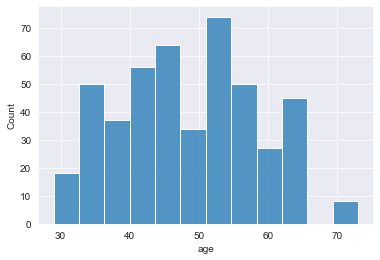

In [24]:
# Question 3: Create a histogram for the age variable
sns.histplot(data=ratings, x='age')

<BarContainer object of 2 artists>

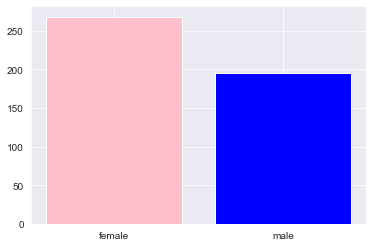

In [29]:
# Question 4: Create a barplot for the gender variable.

plt.bar(ratings.gender.unique(),ratings.gender.value_counts(),color=['pink','blue'])

In [31]:
# Question 5: What is the median evaluation score for tenured professors?
ratings[ratings['tenure'] == 'yes']['eval'].median()

4.0

In [32]:
ratings['age'].mean(), ratings['age'].std()

(48.365010799136066, 9.802742037864821)

In [33]:
no_duplicates_ratings = ratings.drop_duplicates(subset=['prof'])
no_duplicates_ratings['age'].mean(), no_duplicates_ratings['age'].std()

(47.5531914893617, 10.25651329515495)

In [35]:
# Using a barchart, demonstrate if instructors teaching lower-division courses receive higher average teaching evaluations
division_eval = ratings.groupby('division')[['eval']].mean().reset_index()
division_eval

,division,eval
0,lower,4.087261
1,upper,3.952614


<AxesSubplot:xlabel='division', ylabel='eval'>

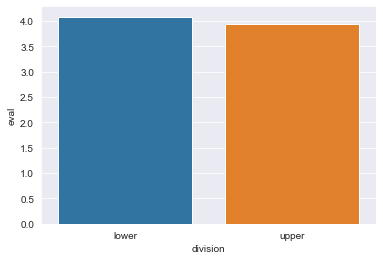

In [36]:
sns.barplot(x='division', y='eval', data=division_eval)

In [37]:
ratings.dtypes

minority            object
age                  int64
gender              object
credits             object
beauty             float64
eval               float64
division            object
native              object
tenure              object
students             int64
allstudents          int64
prof                 int64
PrimaryLast          int64
vismin               int64
female               int64
single_credit        int64
upper_division       int64
English_speaker      int64
tenured_prof         int64
dtype: object

<AxesSubplot:xlabel='age', ylabel='eval'>

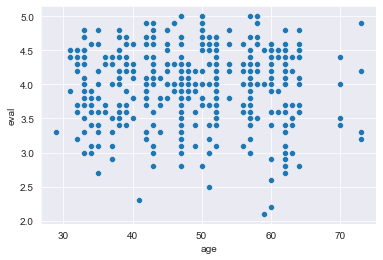

In [38]:
# plot the relationship between age and teaching evaluation scores
sns.scatterplot(x='age', y='eval', data=ratings)

<AxesSubplot:xlabel='age', ylabel='eval'>

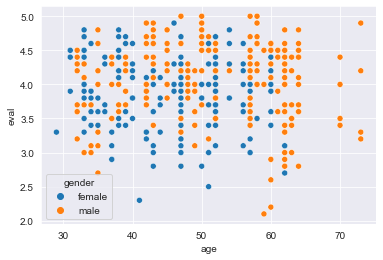

In [39]:
# plot the relationship between age and teaching evaluation score using gendeer_differentiated scatter plots.
sns.scatterplot(x='age', y='eval', hue='gender', data=ratings)

<AxesSubplot:xlabel='beauty', ylabel='credits'>

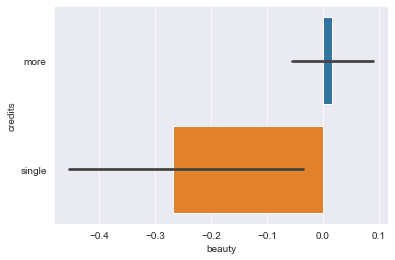

In [40]:
# create a plot for beauty scores differentiated by credits.
sns.barplot(x='beauty', y='credits', data=ratings)

<AxesSubplot:xlabel='beauty', ylabel='credits'>

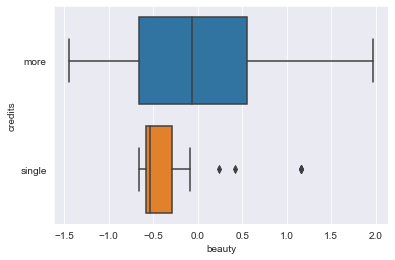

In [41]:
sns.boxplot(x='beauty', y='credits', data=ratings)

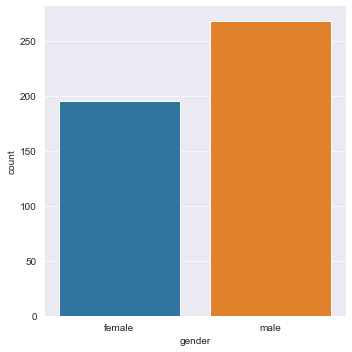

In [42]:
# What is the number of courses taught by gender?
sns.catplot(x='gender', kind='count', data=ratings)

TypeError: 'NoneType' object is not iterable

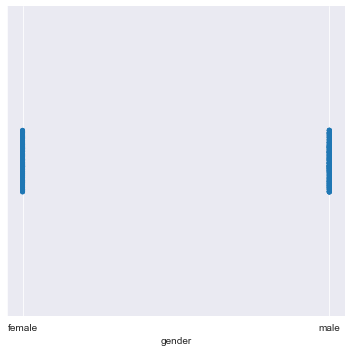

In [47]:
# create a group histogram of taught by gender and tenure?
sns.catplot(data=ratings, x='gender', hue='tenure')

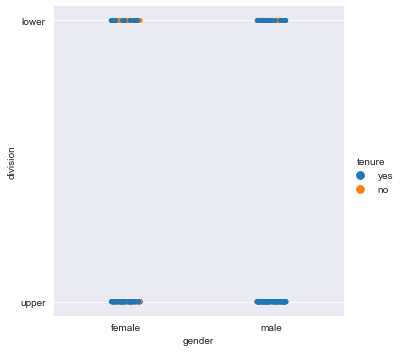

In [48]:
# add division as another factor to the above histogram
sns.catplot(data=ratings, x='gender', y='division', hue='tenure')

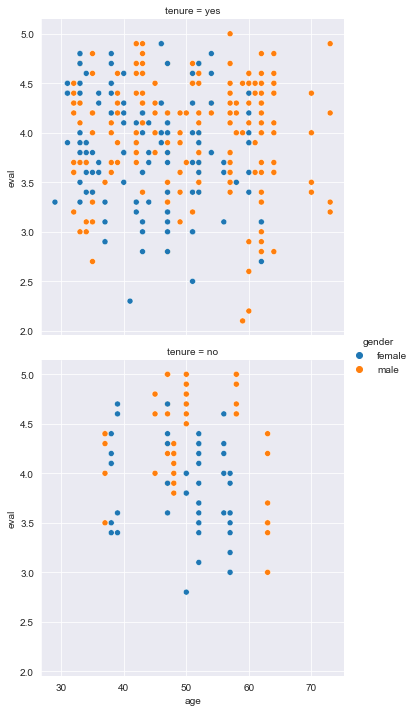

In [51]:
# create a scatterplot of age and evaluation scores differentiated by gender and tenure?
sns.relplot(data=ratings, x='age', y='eval', hue='gender', row='tenure')

C:\Users\lorac\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

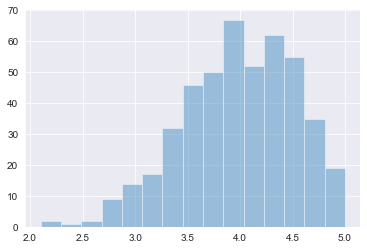

In [52]:
# create a distribution plot of teaching evaluation scores.
sns.distplot(x=ratings['eval'], kde=False)

C:\Users\lorac\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='eval'>

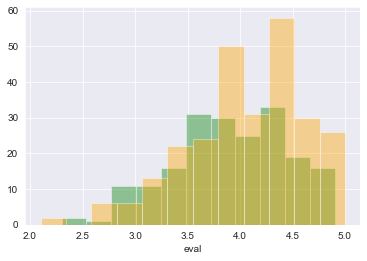

In [53]:
# create a distribution plot of teaching evaluation score with gender as a factor
sns.distplot(ratings[ratings['gender'] == 'female']['eval'], color='green', kde=False)
sns.distplot(ratings[ratings['gender'] == 'male']['eval'], color='orange', kde=False)

<AxesSubplot:xlabel='gender', ylabel='age'>

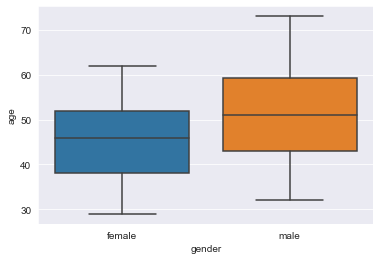

In [54]:
sns.boxplot(x='gender', y='age', data=ratings)

C:\Users\lorac\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='beauty'>

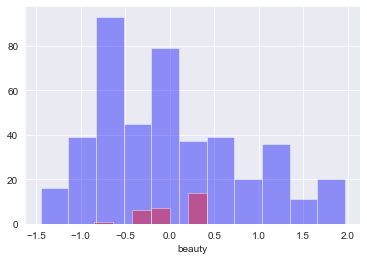

In [55]:
# create a distribution plot of beauty scores with native english speaker as a factor
sns.distplot(ratings[ratings['native'] == 'yes']['beauty'], color='blue', kde=False)
sns.distplot(ratings[ratings['native'] == 'no']['beauty'], color='red', kde=False)

<AxesSubplot:xlabel='age', ylabel='minority'>

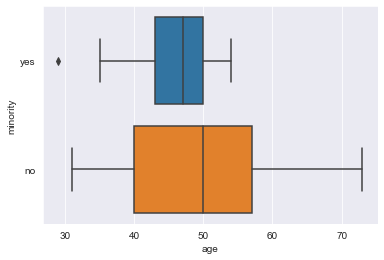

In [56]:
# create a horizontal boxplot of the age of the instructors by a visible minority
sns.boxplot(data=ratings, x='age', y='minority')

In [57]:
ratings.dtypes

minority            object
age                  int64
gender              object
credits             object
beauty             float64
eval               float64
division            object
native              object
tenure              object
students             int64
allstudents          int64
prof                 int64
PrimaryLast          int64
vismin               int64
female               int64
single_credit        int64
upper_division       int64
English_speaker      int64
tenured_prof         int64
dtype: object

0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
458    yes
459    yes
460    yes
461    yes
462    yes
Name: native, Length: 463, dtype: object

C:\Users\lorac\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='beauty'>

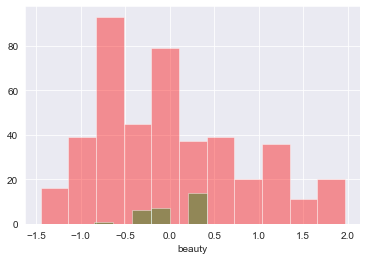

In [59]:
# Question 1: Create a distribution plot of beauty scores with Native English speaker as a factor
native_english = ratings[ratings['native'] == 'yes']['beauty']
no_native_english = ratings[ratings['native'] == 'no']['beauty']

sns.distplot(native_english, color='red', kde=False)
sns.distplot(no_native_english, color='green', kde=False)

<AxesSubplot:xlabel='age', ylabel='minority'>

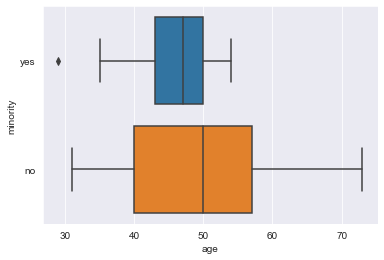

In [63]:
# Question 2: Create a horizontal boxplot of the age of the instructors by visible minority?
sns.boxplot(y='minority', x='age', data=ratings)

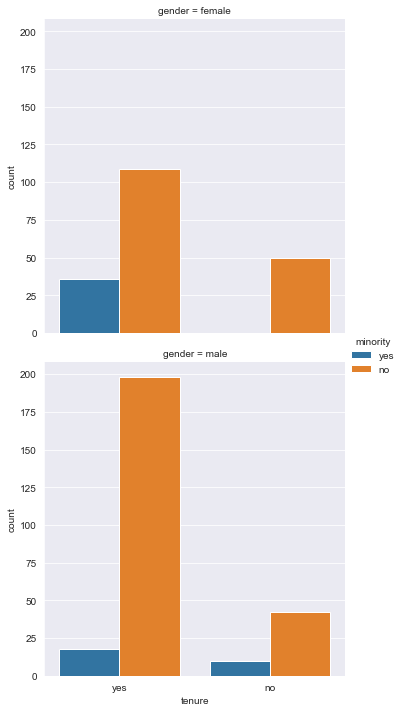

In [66]:
# Question 3: Create a group histogram of tenure by minority and add the gender factor
sns.catplot(x='tenure', hue='minority', row='gender', kind='count', data=ratings)

<AxesSubplot:xlabel='age'>

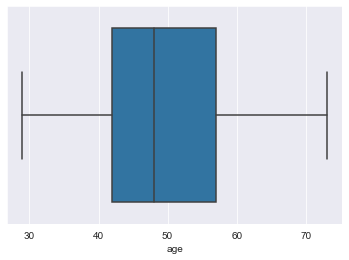

In [67]:
# Question 4: create a boxplot of the age variable
sns.boxplot(x='age', data=ratings)

In [ ]:
# Probability Distribution

In [68]:
from scipy.stats import norm

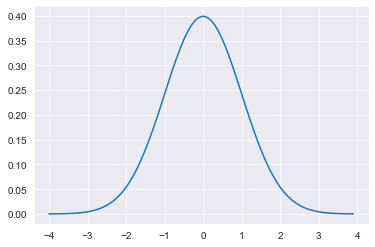

In [69]:
# plot between -4 and 4 with 0.1 steps
x_axis = np.arange(-4, 4, 0.1)
plt.plot(x_axis, norm.pdf(x_axis, 0, 1))
plt.show()

In [70]:
# using the teacher's rating dataset, what is the probability of receiving an evaluation score of greater than 4.5?

# P(X>4.5)
mean_eval = ratings['eval'].mean()
std_eval = ratings['eval'].std()
mean_eval, std_eval

(3.9982721362721585, 0.5548655704870059)

In [71]:
# Normal Distribution
1 - norm.cdf(4.5, mean_eval, std_eval)

0.18293588278210904

In [72]:
# Using the teacher's rating dataset, what is the probability of receiving an evaluation score greater than 3.5 and less than 4.2?

norm.cdf(4.2, mean_eval, std_eval) - norm.cdf(3.5, mean_eval, std_eval)

0.45731592645021807

Using the two-tailed test from normal distribution:
- A professional basketball team wants to compare its performance with that of players in regional league.
- The pros are known to have a historic mean of 12 points per game with standard deviation of 5.5
- A group of 36 regional played recorded on average 10.7 points per game.
- The pro coach would like to know whether his professional team scores on average are different from that of the regional players.

H0: the mean point of the regional players is not diffeent from the historic mean.
H1: the mean point of the regional players is different from the historic mean.

In [74]:
2*round(norm.cdf((10.7 - 12)/(5.5/np.sqrt(36))), 3)

0.156

In [75]:
# Using the teachers rating dataset, what is the probability of receiving an evaluation score greater than 3.3?
# P(X>3.3)

1 - norm.cdf((3.3 - mean_eval)/std_eval)

0.895885978311121

In [76]:
# using the teachers rating dataset, what is the probability of receiving an evaluation score between 2 and 3?

norm.cdf((3-mean_eval)/std_eval) - norm.cdf((2-mean_eval)/std_eval)

0.03584123270783767

In [ ]:
# Hypothesis Testing

T-Test: Using the teachers' rating set, does gender affect teaching evaluation rates?

t-test for independent samples. For the independent t-test, the following assumptions must be met:
* One independent, categorical variable with two levels or group.
* One dependent continuous variable.
* Independence of the observations - each subject should belong to only one group. There is no relationship between the observations in each group.
* The dependent variable must follow a normal distribution.
* Assumption of homogeneity of variance

In [ ]:
# H0: there is no difference in evaluation scores between males and females.
# H1: there is a difference in evaluation scores between males and females.

C:\Users\lorac\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='eval', ylabel='Density'>

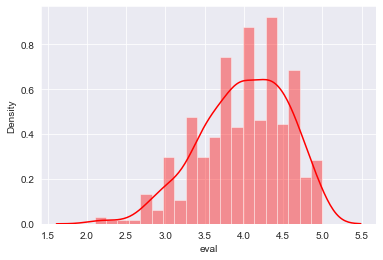

In [77]:
# Plot the dependent variable with a histogram.
sns.distplot(ratings['eval'], bins=20, kde=True, color='red')

In [80]:
# We can use the Levene's Test in python to check the test significance
from scipy import stats

stats.levene(ratings[ratings['gender'] == 'female']['eval'], ratings[ratings['gender'] == 'male']['eval'], center='mean')

# since the p-value is greater than 0.05 we can assume equality of variance.

LeveneResult(statistic=0.19032922435292574, pvalue=0.6628469836244741)

In [81]:
stats.ttest_ind(ratings[ratings['gender'] == 'female']['eval'], ratings[ratings['gender']=='male']['eval'], equal_var=True)

Ttest_indResult(statistic=-3.249937943510772, pvalue=0.0012387609449522217)

Since p-value is less than 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in teaching evaluations based on gender.

ANOVA: Using the teachers' rating dataset, does beauty score for instructors differ by age.

In [83]:
ratings.loc[(ratings['age'] <= 40), 'age_group'] = '40 years and younger'
ratings.loc[(ratings['age'] > 40)&(ratings['age'] < 57), 'age_group'] = 'between 40 and 57 years'
ratings.loc[(ratings['age'] >= 57), 'age_group'] = '57 years and older'

In [84]:
stats.levene(ratings[ratings['age_group'] == '40 years and younger']['beauty'],
                   ratings[ratings['age_group'] == 'between 40 and 57 years']['beauty'],
                   ratings[ratings['age_group'] == '57 years and older']['beauty'],
                   center='mean')
# since the p-value is less than 0.05, the variance are not equal, for the purposes of this exercise, we will move along

LeveneResult(statistic=8.60005668392584, pvalue=0.000215366180993476)

In [ ]:
forty_lower = ratings_df[ratings_df['age_group'] == '40 years and younger']['beauty']
forty_fiftyseven = ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['beauty']
fiftyseven_older = ratings_df[ratings_df['age_group'] == '57 years and older']['beauty']